In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('df2.xlsx', sheet_name='Sheet1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
464    NaN  200.47               21.5                17.8                 5.5   
465    NaN  191.20               20.6                17.2                 5.5   
466    NaN  242.85               22.0                18.8                 5.5   
467    NaN  234.31               22.4                19.0                 6.0   
468    NaN  231.34               22.2                18.7                 6.0   
469    NaN  130.10               19.3                16.6                 5.0   
470    NaN  209.89               21.5                18.3                 5.7   
471    NaN  220.04               22.0                18.8                 5.5   
472    NaN  164.67               20.7                17.6                 5.5   
473    NaN  224.58               22.0                19.6                 6.3   

     altura  espessura  Cluster  cluster  
464     6.5        3.1        0        0  
465     6.2        2.9

In [3]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [4]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,1583
1,Target,peso
2,Target type,Regression
3,Original data shape,"(474, 9)"
4,Transformed data shape,"(474, 8)"
5,Transformed train set shape,"(379, 8)"
6,Transformed test set shape,"(95, 8)"
7,Numeric features,8
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5.3493,61.5213,7.7615,0.9868,0.0560,0.0460,0.0650
et,Extra Trees Regressor,5.2303,61.3672,7.7858,0.9866,0.0555,0.0446,0.0520
lightgbm,Light Gradient Boosting Machine,5.5079,66.3628,8.0866,0.9859,0.0590,0.0481,0.1050
gbr,Gradient Boosting Regressor,5.5603,66.9860,8.1658,0.9855,0.0584,0.0474,0.0310
xgboost,Extreme Gradient Boosting,5.7433,73.8347,8.5694,0.9841,0.0614,0.0494,0.1080
ada,AdaBoost Regressor,6.3276,75.3048,8.5902,0.9840,0.0873,0.0696,0.0320
dt,Decision Tree Regressor,7.0658,113.8705,10.5620,0.9757,0.0762,0.0612,0.0160
knn,K Neighbors Regressor,6.0487,128.5576,10.5336,0.9728,0.0829,0.0517,0.0190
lasso,Lasso Regression,10.2853,162.6543,12.6591,0.9655,0.2419,0.1272,0.0140
llar,Lasso Least Angle Regression,10.2961,163.1562,12.6782,0.9654,0.2419,0.1272,0.0110


In [5]:
rf = exp2.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.7373,56.1578,7.4939,0.9869,0.0598,0.0511
1,5.9979,80.8210,8.9901,0.9847,0.0579,0.0457
2,5.9349,64.7293,8.0454,0.9797,0.0664,0.0528
3,5.5698,80.8804,8.9934,0.9826,0.0542,0.0421
4,4.8332,68.1663,8.2563,0.9865,0.0592,0.0448
5,6.5112,87.7798,9.3691,0.9829,0.0642,0.0535
6,4.0305,35.0163,5.9175,0.9923,0.0485,0.0392
7,5.2895,76.3119,8.7357,0.9886,0.0593,0.0500
8,5.9474,62.5935,7.9116,0.9851,0.0689,0.0571


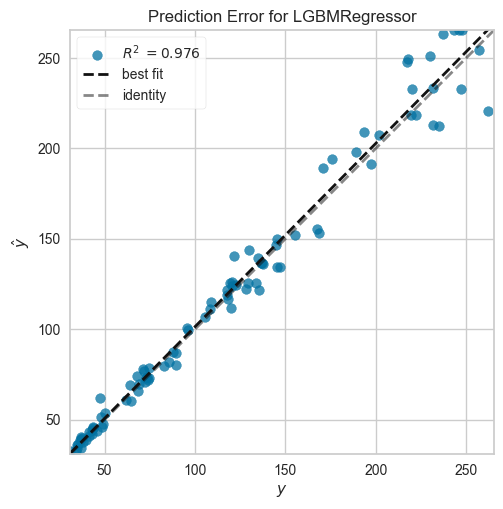

In [6]:
exp2.plot_model(rf, plot = 'error')

In [7]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.9768,113.0247,10.6313,0.9760,0.0676,0.0548


,Index,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura,Cluster,cluster,peso,prediction_label
412,NaN,22.400000,18.799999,6.0,7.1,3.1,0,0,246.169998,265.274320
471,NaN,22.000000,18.799999,5.5,6.5,3.0,0,0,220.039993,232.763115
70,NaN,12.400000,10.600000,3.1,3.8,1.6,0,0,35.240002,36.716303
400,NaN,22.500000,19.299999,5.8,7.6,3.0,0,0,237.179993,263.290928
463,NaN,21.200001,17.600000,5.5,6.2,2.9,0,0,189.020004,197.959926
242,NaN,18.299999,15.400000,5.0,5.2,2.3,0,0,117.519997,121.889446
217,NaN,15.200000,13.000000,4.3,4.7,2.0,0,0,71.720001,77.012360
301,NaN,19.700001,16.700001,5.6,5.5,2.7,0,0,167.449997,155.635654
413,NaN,21.000000,17.600000,5.4,6.5,3.0,0,0,193.600006,208.795894
246,NaN,18.700001,16.000000,5.4,5.5,2.3,0,0,136.899994,136.649796


In [9]:
peso_pred_semEspe.head()

,Index,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura,Cluster,cluster,peso,prediction_label
87,NaN,12.200000,10.200000,3.1,3.8,1.5,0,0,34.880001,34.327216
409,NaN,21.500000,18.700001,6.0,7.2,2.8,0,0,217.220001,247.854827
468,NaN,22.200001,18.700001,6.0,6.5,3.0,0,0,231.339996,233.477474
27,NaN,11.800000,10.100000,3.0,3.5,1.6,0,0,31.139999,32.548518
96,NaN,13.300000,11.200000,3.4,4.0,1.8,0,0,43.200001,44.026719


# Salvando do Modelo

In [10]:
### Saving model 
#save_model(rf, 'gbr_df1') 


In [11]:
################### LOADING MODEL
#saved_rf = load_model('gbr_df1') 

#saved_rf 

In [12]:
#exp2.predict_model(saved_rf)

In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)